Interactive Visualizations:

Original Datase:

- https://www.kaggle.com/datasets/vivek468/superstore-dataset-final

------------------------------------------
# i. Data Explorations

### Import library:

In [126]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from IPython.core.display import display, HTML

C:\Users\fahri\AppData\Local\Temp\ipykernel_6628\1783703635.py:6: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


### Load dataset:

In [127]:
df = pd.read_csv(r"C:\Users\fahri\OneDrive\Desktop\Playgr\[98] datasets\Sample - Superstore.csv", encoding='latin1')

### Preview dataset:

In [128]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [129]:
pd.set_option('display.max_columns', None)
df.sample(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
8787,8788,CA-2017-145765,5/28/2017,6/2/2017,Standard Class,CM-11815,Candace McMahon,Corporate,United States,Phoenix,Arizona,85023,West,TEC-AC-10000844,Technology,Accessories,Logitech Gaming G510s - Keyboard,271.968,4,0.2,54.3936
1237,1238,CA-2016-144344,10/28/2016,10/28/2016,Same Day,PG-18820,Patrick Gardner,Consumer,United States,Boynton Beach,Florida,33437,South,FUR-FU-10003553,Furniture,Furnishings,"Howard Miller 13-1/2"" Diameter Rosebrook Wall ...",165.048,3,0.2,41.2620
1279,1280,CA-2014-163293,9/8/2014,9/11/2014,First Class,KC-16255,Karen Carlisle,Corporate,United States,Macon,Georgia,31204,South,TEC-AC-10000023,Technology,Accessories,"Maxell 74 Minute CD-R Spindle, 50/Pack",83.880,4,0.0,30.1968
2860,2861,CA-2017-138975,5/19/2017,5/23/2017,Standard Class,SC-20380,Shahid Collister,Consumer,United States,Atlanta,Georgia,30318,South,FUR-BO-10004695,Furniture,Bookcases,O'Sullivan 2-Door Barrister Bookcase in Odessa...,1628.820,9,0.0,374.6286
92,93,CA-2015-149587,1/31/2015,2/5/2015,Second Class,KB-16315,Karl Braun,Consumer,United States,Minneapolis,Minnesota,55407,Central,OFF-PA-10003177,Office Supplies,Paper,Xerox 1999,12.960,2,0.0,6.2208


*The dataset has 20 entries that consist of:*

    Row ID          : Unique ID for each row.
    Order ID        : Unique Order ID for each Customer.
    Order Date      : Order Date of the product.
    Ship Date       : Shipping Date of the Product.
    Ship Mode       : Shipping Mode specified by the Customer.
    Customer ID     : Unique ID to identify each Customer.
    Customer Name   : Name of the Customer.
    Segment         : The segment where the Customer belongs.
    Country         : Country of residence of the Customer.
    City            : City of residence of of the Customer.
    State           : State of residence of the Customer.
    Postal Code     : Postal Code of every Customer.
    Region          : Region where the Customer belong.
    Product ID      : Unique ID of the Product.
    Category        : Category of the product ordered.
    Sub-Category    : Sub-Category of the product ordered.
    Product Name    : Name of the Product
    Sales           : Sales of the Product.
    Quantity        : Quantity of the Product.
    Discount        : Discount provided.
    Profit          : Profit/Loss incurred.

### Structure and data format

In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

*Several data types are not match the actual data, such as `Order Date` & `Ship Date`.*

*The discount column needs to be clarified whether it is in percentage units or not.*

*Plausible to drop some columns, such as `Row ID`.*

In [131]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [132]:
df.describe(include="object")

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Region,Product ID,Category,Sub-Category,Product Name
count,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994
unique,5009,1237,1334,4,793,793,3,1,531,49,4,1862,3,17,1850
top,CA-2017-100111,9/5/2016,12/16/2015,Standard Class,WB-21850,William Brown,Consumer,United States,New York City,California,West,OFF-PA-10001970,Office Supplies,Binders,Staple envelope
freq,14,38,35,5968,37,37,5191,9994,915,2001,3203,19,6026,1523,48


In [133]:
df.shape

(9994, 21)

*Based on a quick glance, the dataset looks fine except for minus value in profit which needs to specified further*

-----------------------------------------------
# ii. Data Preparations

### Missing Values Handling

In [134]:
df.isnull().sum().sort_values(ascending=False)/len(df)*100

Row ID           0.0
Postal Code      0.0
Discount         0.0
Quantity         0.0
Sales            0.0
Product Name     0.0
Sub-Category     0.0
Category         0.0
Product ID       0.0
Region           0.0
State            0.0
Order ID         0.0
City             0.0
Country          0.0
Segment          0.0
Customer Name    0.0
Customer ID      0.0
Ship Mode        0.0
Ship Date        0.0
Order Date       0.0
Profit           0.0
dtype: float64

In [135]:
df.isna().sum().sort_values(ascending=False)/len(df)*100

Row ID           0.0
Postal Code      0.0
Discount         0.0
Quantity         0.0
Sales            0.0
Product Name     0.0
Sub-Category     0.0
Category         0.0
Product ID       0.0
Region           0.0
State            0.0
Order ID         0.0
City             0.0
Country          0.0
Segment          0.0
Customer Name    0.0
Customer ID      0.0
Ship Mode        0.0
Ship Date        0.0
Order Date       0.0
Profit           0.0
dtype: float64

*No missing values*

### Duplicates Handling

In [136]:
df[df.duplicated()]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit


*No duplicated values*

### Inconsistent Format Handling

Changing Dates columns data types from object to Datetime

In [137]:
df['Order Date'] = df['Order Date'].astype('datetime64[ns]')
df['Ship Date'] = df['Ship Date'].astype('datetime64[ns]')

In [138]:
#df['year'] = df['date_added'].dt.year

                                        *cek apakah butuh bulanan & tahunan*

### Cleaning Individual Columns

In [139]:
df.sample(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
6440,6441,CA-2016-101161,2016-10-13,2016-10-20,Standard Class,BW-11110,Bart Watters,Corporate,United States,New York City,New York,10024,East,OFF-AR-10001860,Office Supplies,Art,BIC Liqua Brite Liner,34.700,5,0.0,12.4920
8915,8916,US-2016-144057,2016-05-09,2016-05-13,Standard Class,CV-12805,Cynthia Voltz,Corporate,United States,Austin,Texas,78745,Central,OFF-BI-10002852,Office Supplies,Binders,Ibico Standard Transparent Covers,13.184,4,0.8,-20.4352


In [140]:
df["Ship Mode"].unique()

array(['Second Class', 'Standard Class', 'First Class', 'Same Day'],
      dtype=object)

In [141]:
df["State"].unique()

array(['Kentucky', 'California', 'Florida', 'North Carolina',
       'Washington', 'Texas', 'Wisconsin', 'Utah', 'Nebraska',
       'Pennsylvania', 'Illinois', 'Minnesota', 'Michigan', 'Delaware',
       'Indiana', 'New York', 'Arizona', 'Virginia', 'Tennessee',
       'Alabama', 'South Carolina', 'Oregon', 'Colorado', 'Iowa', 'Ohio',
       'Missouri', 'Oklahoma', 'New Mexico', 'Louisiana', 'Connecticut',
       'New Jersey', 'Massachusetts', 'Georgia', 'Nevada', 'Rhode Island',
       'Mississippi', 'Arkansas', 'Montana', 'New Hampshire', 'Maryland',
       'District of Columbia', 'Kansas', 'Vermont', 'Maine',
       'South Dakota', 'Idaho', 'North Dakota', 'Wyoming',
       'West Virginia'], dtype=object)

In [142]:
df["Country"].unique()

array(['United States'], dtype=object)

In [143]:
#df["Category"].unique()
df["Sub-Category"].unique()

array(['Bookcases', 'Chairs', 'Labels', 'Tables', 'Storage',
       'Furnishings', 'Art', 'Phones', 'Binders', 'Appliances', 'Paper',
       'Accessories', 'Envelopes', 'Fasteners', 'Supplies', 'Machines',
       'Copiers'], dtype=object)

In [144]:
df["Discount"].unique()
df["Discount"].mean()

0.15620272163298934

** diskon kayanya belum dikali 100

In [145]:
df[(df['Quantity'] < 0)]
df[(df['Sales'] < 0)]
df[(df['Discount'] < 0)]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit


### Other transformations

In [146]:
df = df.drop(columns=['Row ID', 'Segment', 'Country', 'Postal Code'])

*some columns are dropped because they are not needed for the analysis*

In [147]:
df['Percent Profit Margin'] = ((df['Profit'] / df['Sales'])*100)

In [148]:
df['Profit per Unit'] =  (df['Profit'] / df['Quantity'])

In [ ]:
df['Profit Category'] = df['Profit'].apply(lambda x: 'Positive' if x >= 0 else 'Negative')

--------

In [149]:
#df.to_csv('csv')

*Saving the cleaned dataset for visualization in Tableau.*

--------------------------
# iii. Analysis 1 : What's driving revenue?

### How is the sales trend over time?

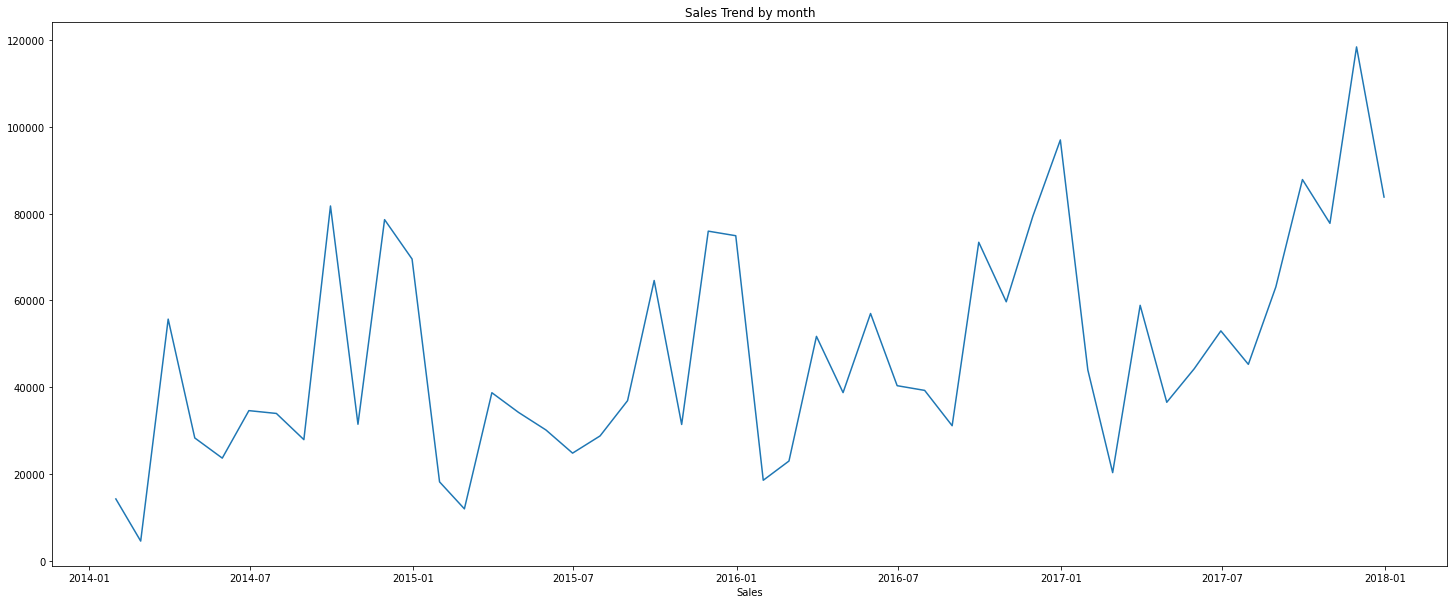

In [168]:
# Grouping the data by Order Date and sums the values
monthly_sales = df.groupby('Order Date').sum()

# Summing the data for each month
monthly_sales = monthly_sales.resample('M').sum()

# Creating Trendline
plt.figure(figsize=(25,10))
plt.plot(monthly_sales['Sales'])
plt.xlabel('Order Date')
plt.xlabel('Sales')
plt.title("Sales Trend by month")
plt.show()

*Monthly sales appear to increase from 2014-2018*

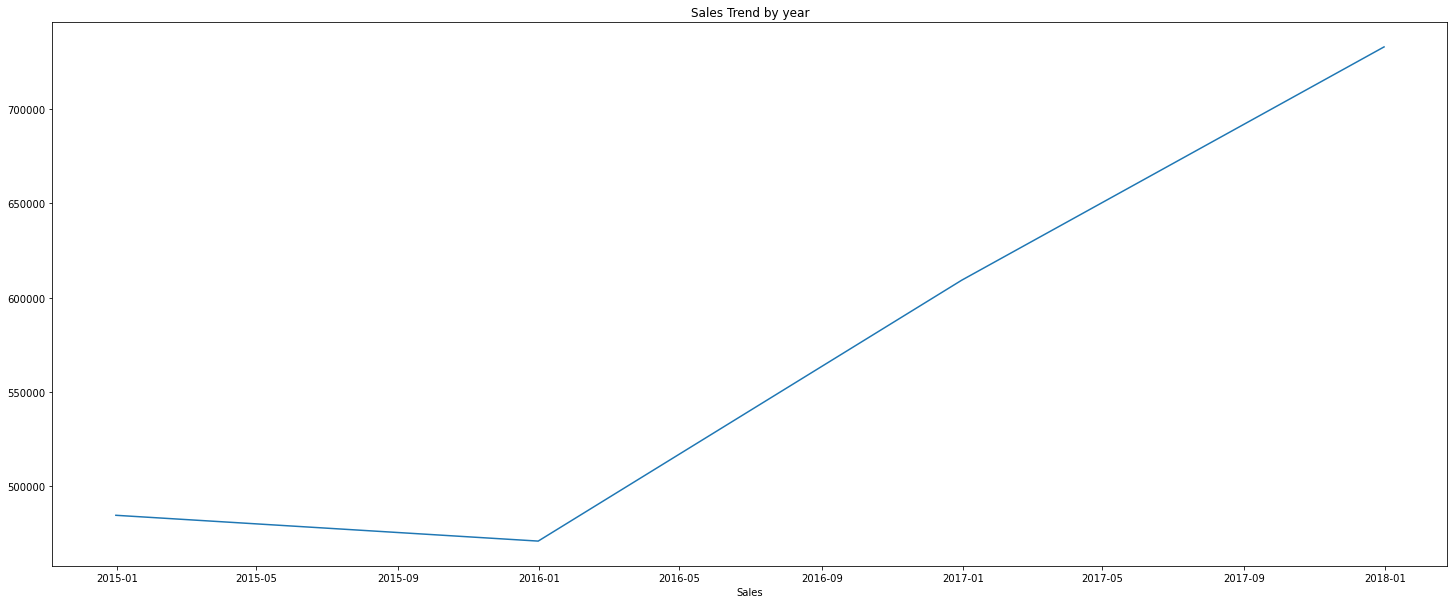

In [151]:
# Grouping the data by Order Date and sums the values
yearly_sales = df.groupby('Order Date').sum()

# Summing the data for each month
yearly_sales = monthly_sales.resample('Y').sum()

# Creating Trendline
plt.figure(figsize=(25,10))
plt.plot(yearly_sales['Sales'])
plt.xlabel('Order Date')
plt.xlabel('Sales')
plt.title("Sales Trend by year")
plt.show()

*Annual sales increased by 50% since 2015 to 2018*

### Which state generates the most sales?

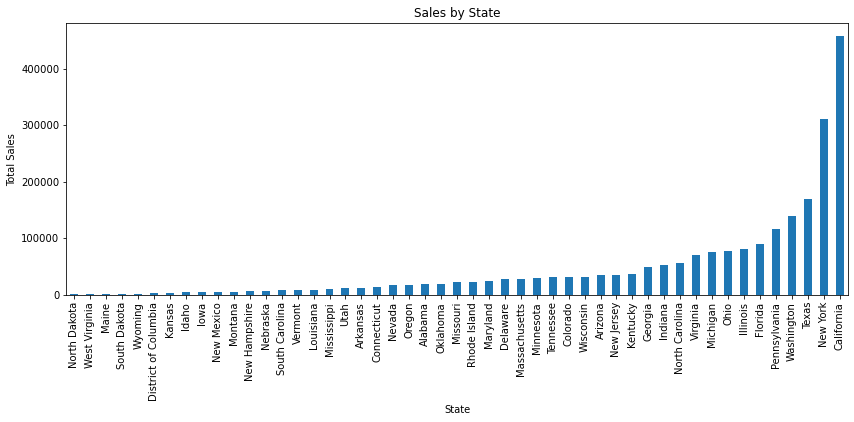

In [152]:
# Grouping sales by according state
sales_per_state = df.groupby('State')['Sales'].sum().sort_values()

# Creating barplot
plt.figure(figsize=(14, 5))
sales_per_state.plot(kind='bar')

# Inserting legend
plt.title('Sales by State')
plt.ylabel('Total Sales')
plt.show()

*Highest sales are in NY and California while lowest in North Dakota and West Virginia*

### Which categories & sub-categories has the highest sales?

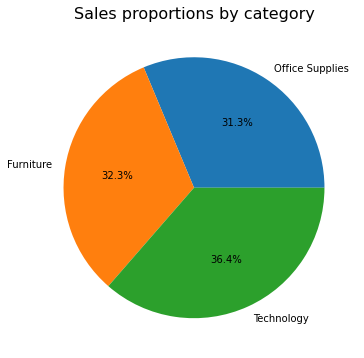

In [153]:
# Grouping by category
sales_per_category = df.groupby('Category')['Sales'].sum().reset_index().sort_values(by='Sales', ascending=True)

# Creating piechart
fig, ax = plt.subplots(figsize=(10, 6))
fig.patch.set_facecolor('white')

plt.pie(sales_per_category['Sales'], labels=sales_per_category['Category'], autopct='%1.1f%%')
plt.title('Sales proportions by category', fontsize=16)

plt.show()

*The proportion of sales is almost even in each category, the largest in tech category*

C:\Users\fahri\AppData\Local\Temp\ipykernel_6628\1440791033.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(labels = ylabels)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


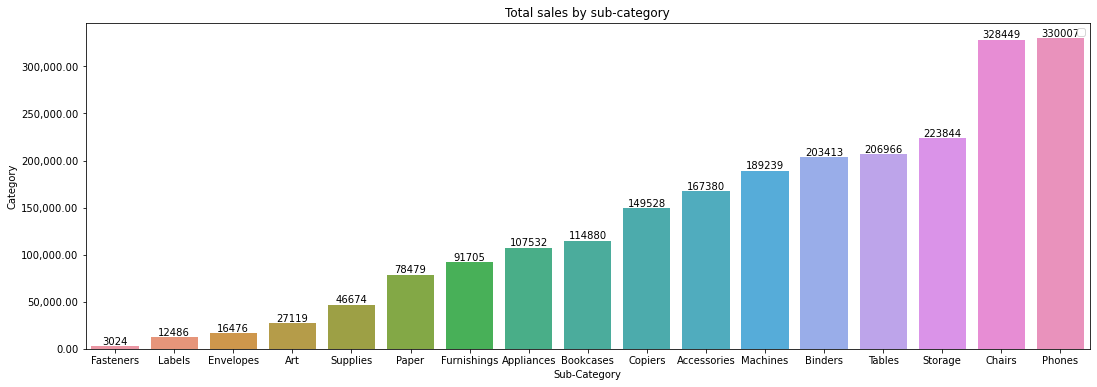

In [154]:
# Grouping by sub-category
sales_per_sub_category = df.groupby('Sub-Category')['Sales'].sum().reset_index().sort_values(by='Sales', ascending=True)

# Creating barplot
fig, ax = plt.subplots(figsize=(18, 6))

sns.barplot(data=sales_per_sub_category, x='Sub-Category', y='Sales', orient='v')

# Inserting data value
ax.bar_label(ax.containers[0], fmt='%.0f', label_type='edge', fontsize=10)

# Inserting legend
ax.set_ylabel('Category')
ylabels = ['{:,.2f}'.format(y) for y in ax.get_yticks()/1]
ax.set_yticklabels(labels = ylabels)
ax.set_title('Total sales by sub-category')
ax.legend()
plt.show()

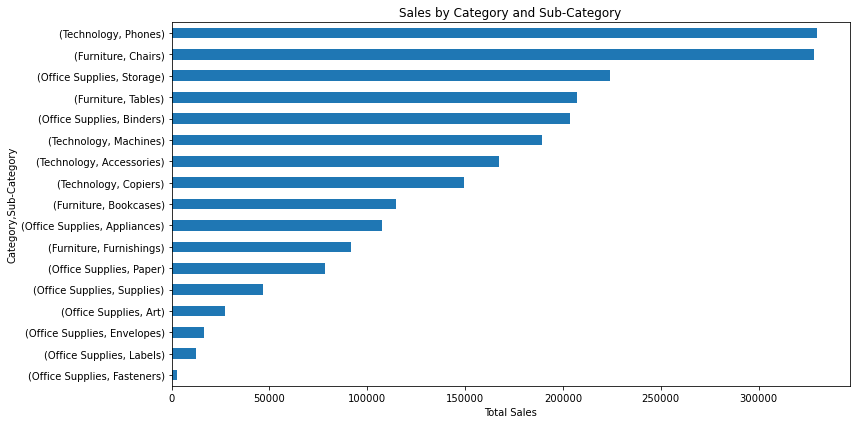

In [155]:
# Grouping by Category and Sub-Category
category_sales = df.groupby(['Category', 'Sub-Category'])['Sales'].sum().sort_values()

# Creating barplot
plt.figure(figsize=(12, 6))

category_sales.plot(kind='barh')
plt.title('Sales by Category and Sub-Category')
plt.xlabel('Total Sales')
plt.tight_layout()
plt.show()

*The biggest sales were on phones & chairs while the lowest were on fasteners & labels*

# iv. Analysis 2 : But are sales really helping the business? (sales vs profit)

### How is profit trend over time?

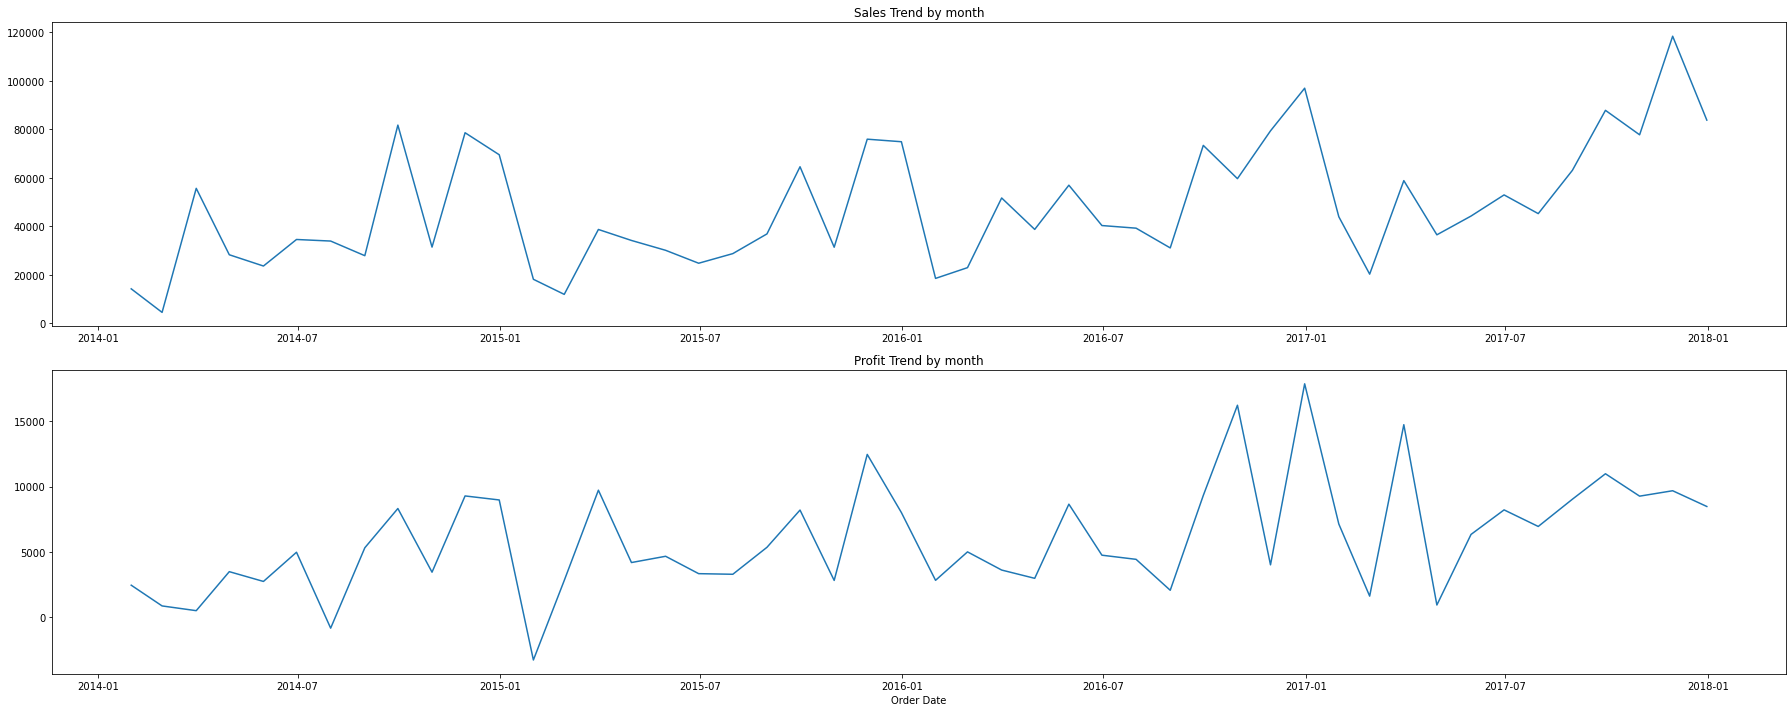

In [156]:
# Creating Trendline
fig, axes = plt.subplots(2,1, figsize=(25,10))
# Sales Trend
axes[0].plot(monthly_sales['Sales'])
#axes[0].set_xlabel('Order Date')
axes[0].set_title("Sales Trend by month")

# Profit Trend
axes[1].plot(monthly_sales['Profit'])
axes[1].set_xlabel('Order Date')
axes[1].set_title("Profit Trend by month")

plt.tight_layout()
plt.show()

*Although it always reaches peak sales at the end of the year, the monthly profits obtained by the company are not always in line with sales trends*

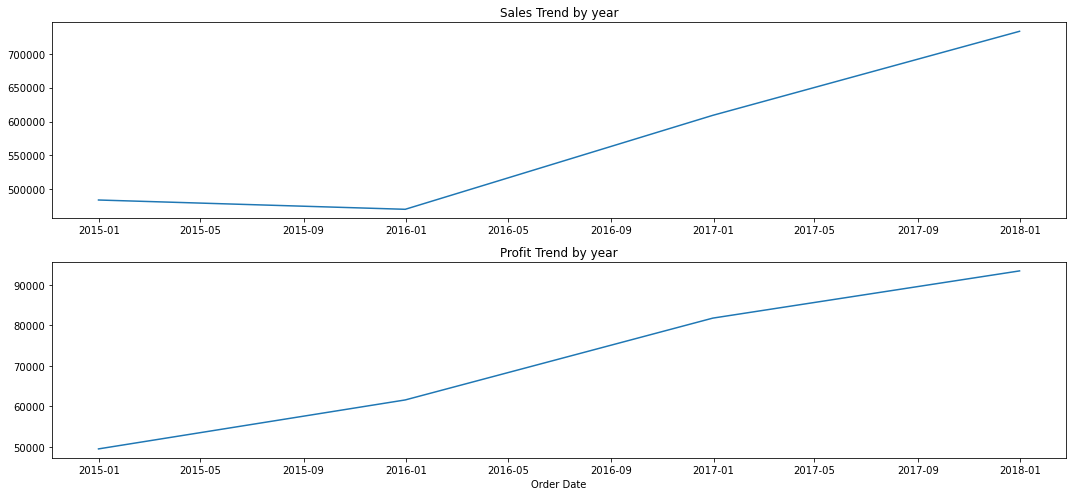

In [157]:
# Creating Trendline
fig, axes = plt.subplots(2,1, figsize=(15,7))

# Sales Trend
axes[0].plot(yearly_sales['Sales'])
#axes[0].set_xlabel('Order Date')
axes[0].set_title("Sales Trend by year")

# Profit Trend
axes[1].plot(yearly_sales['Profit'])
axes[1].set_xlabel('Order Date')
axes[1].set_title("Profit Trend by year")

plt.tight_layout()
plt.show()

*The company's profits increase gradually from year to year*

### Which state generates the most profit?

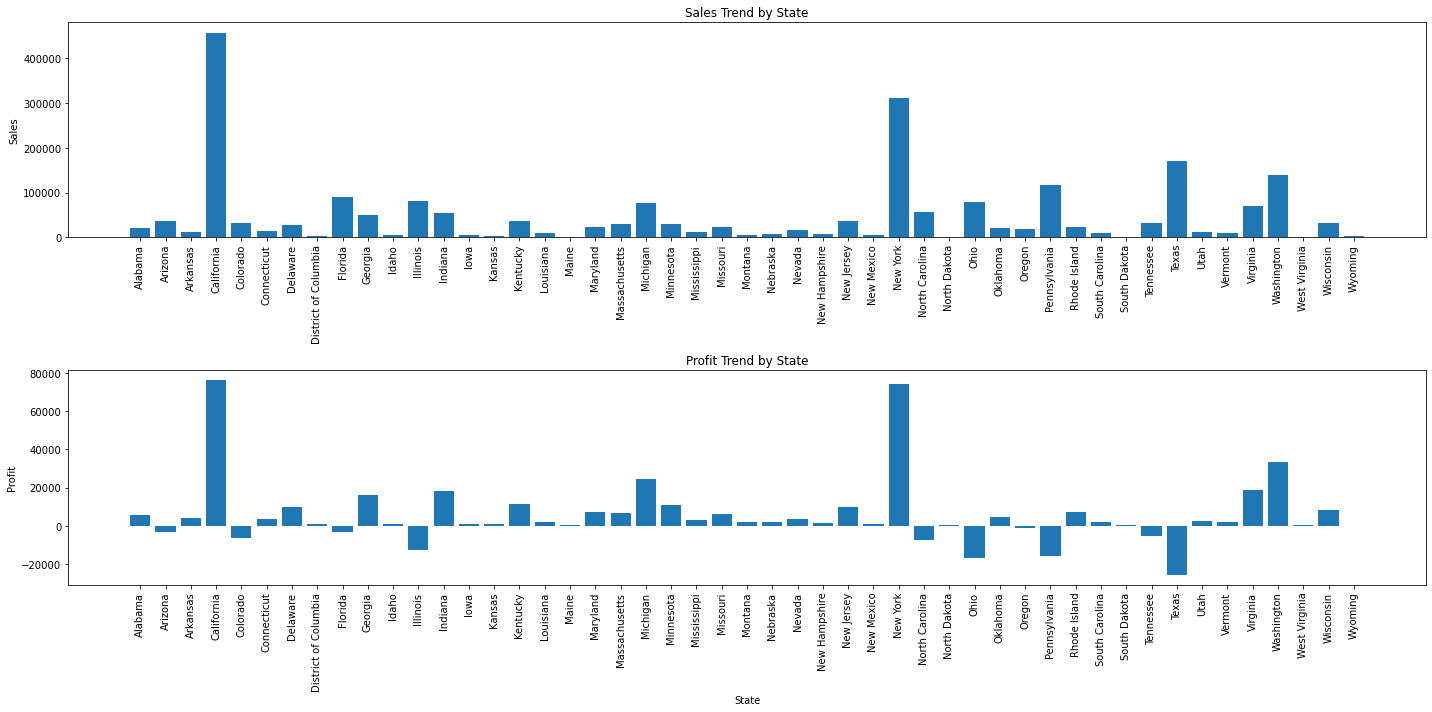

In [233]:
# Grouping sales by according state
sales_per_state = df.groupby('State')['Sales'].sum().sort_index()
profit_per_state = df.groupby('State')['Profit'].sum().sort_index()

# Create figure
fig, axes = plt.subplots(2,1, figsize=(20,10))

# Sales by state
axes[0].bar(sales_per_state.index, sales_per_state.values)
#axes[0].set_xlabel('State')
axes[0].set_ylabel('Sales')
axes[0].set_title("Sales Trend by State")
axes[0].tick_params(axis='x', rotation=90)

# Profit by state
axes[1].bar(profit_per_state.index, profit_per_state.values)
axes[1].set_xlabel('State')
axes[1].set_ylabel('Profit')
axes[1].set_title("Profit Trend by State")
axes[1].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

*Align to total sales, NY and California are at the top of the profit ranking. However, cities with relatively lower sales have also had low or even negative profit*

### Which categories & sub-categories has the highest profit?

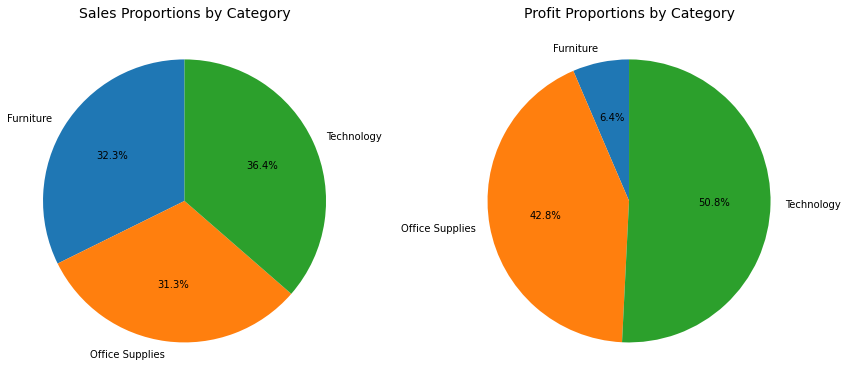

In [159]:
# Grouping by category
sales_per_category = df.groupby('Category')['Sales'].sum().reset_index().sort_values(by='Category', ascending=True)
profit_per_category = df.groupby('Category')['Profit'].sum().reset_index().sort_values(by='Category', ascending=True)

# Creating pie chart
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
fig.patch.set_facecolor('white')

# Sales by category
axes[0].pie(sales_per_category['Sales'],
            labels=sales_per_category['Category'],
            autopct='%1.1f%%',
            startangle=90)
axes[0].set_title('Sales Proportions by Category', fontsize=14)

# Profit by category
axes[1].pie(profit_per_category['Profit'],
            labels=profit_per_category['Category'],
            autopct='%1.1f%%',
            startangle=90)
axes[1].set_title('Profit Proportions by Category', fontsize=14)

plt.tight_layout()
plt.show()

*Although the sales contribution is almost even, half of the company's revenue comes from the tech category*

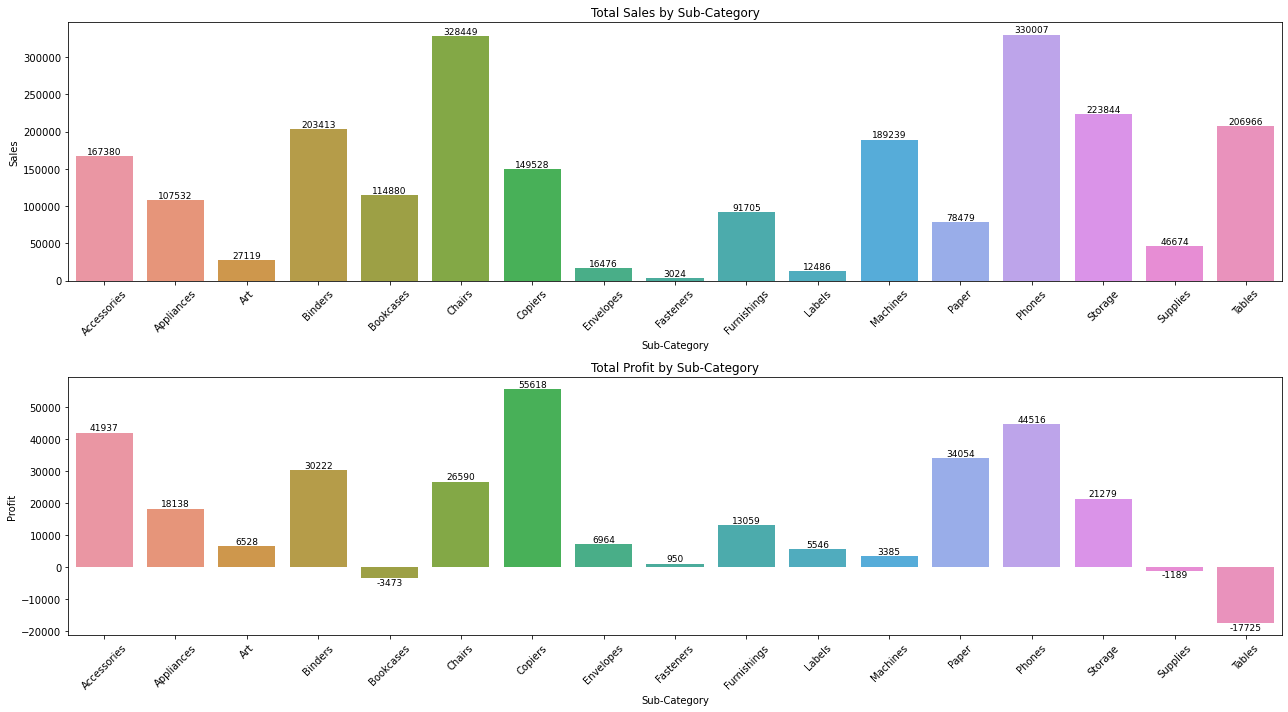

In [160]:
# Grouping by sub-category
sales_per_sub_category = df.groupby('Sub-Category')['Sales'].sum().reset_index().sort_index()#sort_values(by='Sales', ascending=True)
profit_per_sub_category = df.groupby('Sub-Category')['Profit'].sum().reset_index().sort_index()#sort_values(by='Profit', ascending=True)

# Creating bar plots
fig, ax = plt.subplots(2, 1, figsize=(18, 10))

# Sales by sub-category
sns.barplot(data=sales_per_sub_category, x='Sub-Category', y='Sales', ax=ax[0])
#ax[0].set_xlabel('Sub-Category')
ax[0].set_ylabel('Sales')
ax[0].set_title('Total Sales by Sub-Category')
ax[0].tick_params(axis='x', rotation=45)
#ax[0].ylabels = ['{:,.2f}'.format(y) for y in ax[0].get_yticks()/1]
#ax[0].set_yticklabels(labels = ax[0].ylabels)

# Profit by sub-category
sns.barplot(data=profit_per_sub_category, x='Sub-Category', y='Profit', ax=ax[1])
ax[1].set_xlabel('Sub-Category')
ax[1].set_ylabel('Profit')
ax[1].set_title('Total Profit by Sub-Category')
ax[1].tick_params(axis='x', rotation=45)

for container in ax[0].containers:
    ax[0].bar_label(container, fmt='%.0f', label_type='edge', fontsize=9)

for container in ax[1].containers:
    ax[1].bar_label(container, fmt='%.0f', label_type='edge', fontsize=9)

plt.tight_layout()
plt.show()

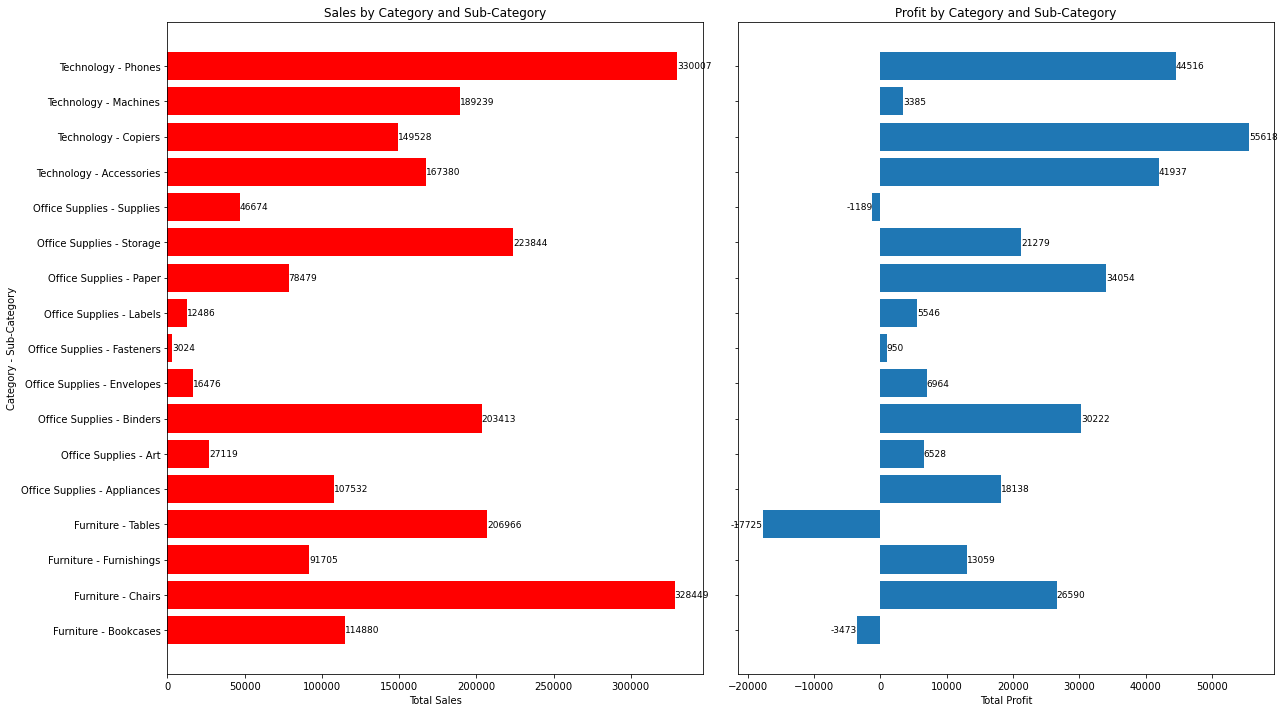

In [161]:
# Grouping by Category and Sub-Category
category_sales = df.groupby(['Category', 'Sub-Category'])['Sales'].sum().sort_index()
category_profit = df.groupby(['Category', 'Sub-Category'])['Profit'].sum().sort_index()

# Convert MultiIndex to strings for display
category_sales.index = ['{} - {}'.format(cat, subcat) for cat, subcat in category_sales.index]
category_profit.index = ['{} - {}'.format(cat, subcat) for cat, subcat in category_profit.index]

# Creating bar plot
fig, ax = plt.subplots(1, 2, figsize=(18, 10), sharey=True)

# Sales plot
ax[0].barh(category_sales.index, category_sales.values, color='red')
ax[0].set_xlabel('Total Sales')
ax[0].set_ylabel('Category - Sub-Category')
ax[0].set_title('Sales by Category and Sub-Category')

# Profit plot
ax[1].barh(category_profit.index, category_profit.values)
ax[1].set_xlabel('Total Profit')
#ax[1].set_ylabel('Category - Sub-Category')
ax[1].set_title('Profit by Category and Sub-Category')

for container in ax[0].containers:
    ax[0].bar_label(container, fmt='%.0f', label_type='edge', fontsize=9)

for container in ax[1].containers:
    ax[1].bar_label(container, fmt='%.0f', label_type='edge', fontsize=9)

plt.tight_layout()
plt.show()

*When we looked at the sub-category without regarding its state, tables, supplies & bookcases contribute to the company's negative profit*

# v. Analysis 3 : The leaks

In [236]:
profit_per_state_sorted = profit_per_state.sort_values()
profit_per_state_sorted = profit_per_state_sorted.head(11)
profit_per_state_sorted

State
Texas            -25729.3563
Ohio             -16971.3766
Pennsylvania     -15559.9603
Illinois         -12607.8870
North Carolina    -7490.9122
Colorado          -6527.8579
Tennessee         -5341.6936
Arizona           -3427.9246
Florida           -3399.3017
Oregon            -1190.4705
Wyoming             100.1960
Name: Profit, dtype: float64

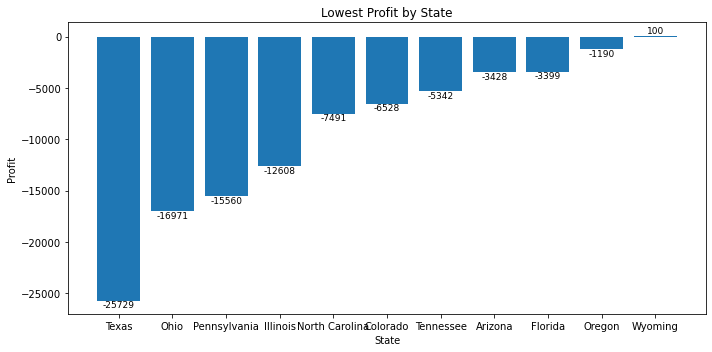

In [237]:
neg_profit_city = df[df['State'].isin(profit_per_state_sorted.index)]
#neg_profit_city

# Grouping sales by according state
profit_per_state_neg = neg_profit_city.groupby('State')['Profit'].sum().sort_values()

# Create figure
fig, axes = plt.subplots(1,1, figsize=(10,5))

# Profit by state
axes.bar(profit_per_state_neg.index, profit_per_state_neg.values)
axes.set_xlabel('State')
axes.set_ylabel('Profit')
axes.set_title("Lowest Profit by State")

for container in axes.containers:
    axes.bar_label(container, fmt='%.0f', label_type='edge', fontsize=9)

plt.tight_layout()
plt.show()

*There are 10 States that has negative profit, and it's dragging the company's overall profit*

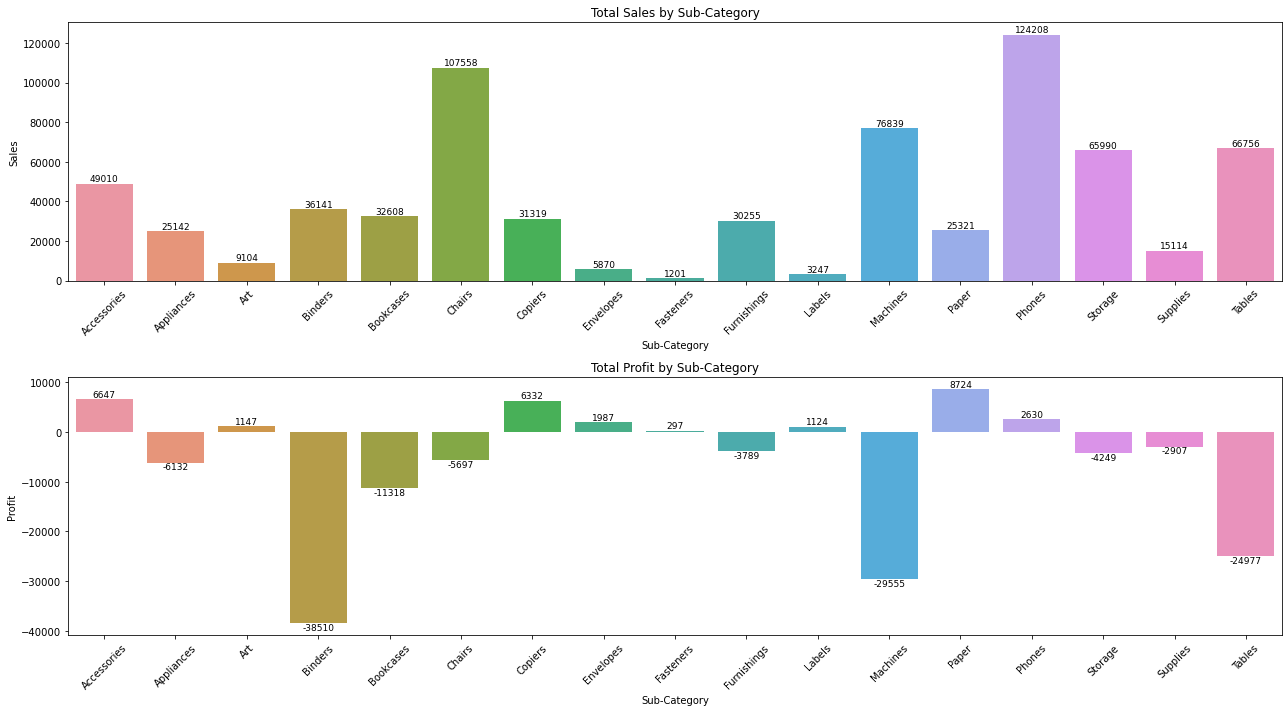

In [206]:
# Grouping by sub-category
sales_per_sub_category_neg = neg_profit_city.groupby('Sub-Category')['Sales'].sum().reset_index().sort_index()#sort_values(by='Sales', ascending=True)
profit_per_sub_category_neg = neg_profit_city.groupby('Sub-Category')['Profit'].sum().reset_index().sort_index()#sort_values(by='Profit', ascending=True)

# Creating bar plots
fig, ax = plt.subplots(2, 1, figsize=(18, 10))

# Sales by sub-category
sns.barplot(data=sales_per_sub_category_neg, x='Sub-Category', y='Sales', ax=ax[0])
#ax[0].set_xlabel('Sub-Category')
ax[0].set_ylabel('Sales')
ax[0].set_title('Total Sales by Sub-Category')
ax[0].tick_params(axis='x', rotation=45)
#ax[0].ylabels = ['{:,.2f}'.format(y) for y in ax[0].get_yticks()/1]
#ax[0].set_yticklabels(labels = ax[0].ylabels)

# Profit by sub-category
sns.barplot(data=profit_per_sub_category_neg, x='Sub-Category', y='Profit', ax=ax[1])
ax[1].set_xlabel('Sub-Category')
ax[1].set_ylabel('Profit')
ax[1].set_title('Total Profit by Sub-Category')
ax[1].tick_params(axis='x', rotation=45)

for container in ax[0].containers:
    ax[0].bar_label(container, fmt='%.0f', label_type='edge', fontsize=9)

for container in ax[1].containers:
    ax[1].bar_label(container, fmt='%.0f', label_type='edge', fontsize=9)

plt.tight_layout()
plt.show()

*Based on its sub-cat, Appliances, binders, bookcases, chairs. furnishings. machines, storage, supplies and tables has negative profit. If we looked at the profit from overall sub-cat, it only has negative profit on tables, supplies and bookcases. These loses even bigger than other sub-cat with positive profit*

-------------------------------
# vi. Conclusions

On the surface, some sub-category appears profitable. However, a deeper look reveals a profitability imbalance: for example, while Chairs and Machines perform well in sales, they consistently lose money — and require immediate attention.

If these underperforming sub-categories continue to grow in sales without profitability, they could erode the margins of their entire category.

- Here are a few recommendations:

`Investigate pricing or supplier costs for these negative profit sub-category`

`Promote high-margin sub-categories like Bindes, Machines and Tables`

`Consider reducing inventory or marketing spend on loss-making sub-categories`

`Evaluate the cost-to-profit ratio for the selected states`

-------------------------------
# STAGING

hitung jumlah kuantitas barang yg negatif profit di negara yang negatif profit (stacked bar chart)

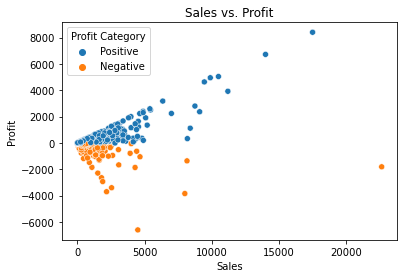

In [ ]:
#sns.scatterplot(data=df, x='Sales', y='Profit')

sns.scatterplot(data=df, x='Sales', y='Profit', hue='Profit Category')

plt.title('Sales vs. Profit')
plt.show()


<AxesSubplot:xlabel='Quantity', ylabel='Profit'>

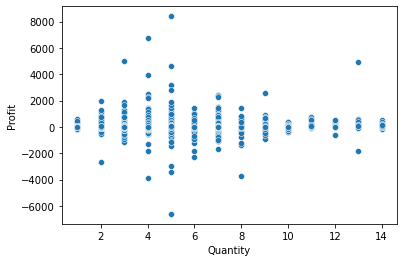

In [165]:
sns.scatterplot(data=df, x='Quantity', y='Profit')

<AxesSubplot:>

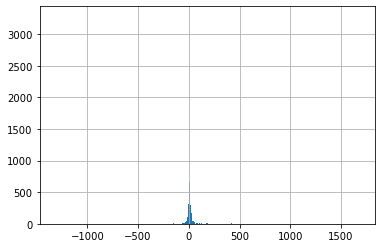

In [166]:
df['Profit per Unit'].hist(bins=1000)

In [ ]:
# Grouping sales by according state
margin_per_state_neg = neg_profit_city.groupby('State')['Percent Profit Margin'].mean().sort_values()

# Create figure
fig, axes = plt.subplots(1,1, figsize=(10,5))

# Profit by state
axes.bar(margin_per_state_neg.index, margin_per_state_neg.values)
axes.set_xlabel('State')
axes.set_ylabel('Profit')
axes.set_title("Profit Trend by State (negative)")

for container in axes.containers:
    axes.bar_label(container, fmt='%.0f', label_type='edge', fontsize=9)

plt.tight_layout()
plt.show()

In [ ]:
# Grouping sales by according state
margin_per_state = df.groupby('State')['Percent Profit Margin'].mean().sort_values()

# Create figure
fig, axes = plt.subplots(1,1, figsize=(20,5))

# Profit by state
axes.bar(margin_per_state.index, margin_per_state.values)
axes.set_xlabel('State')
axes.set_ylabel('Profit')
axes.set_title("Profit Margin by State (negative)")

for container in axes.containers:
    axes.bar_label(container, fmt='%.0f', label_type='edge', fontsize=9)

plt.tight_layout()
plt.show()